In [1]:
import librosa
import numpy as np
import time

def load_audio(file_path):
    """Charge un fichier audio."""
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

def calculate_snr(original, processed):
    """Calcule le rapport signal/bruit (SNR)."""
    signal_power = np.sum(processed ** 2)
    noise_power = np.sum((original - processed) ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Chemins des fichiers audio
original_audio_path = "data/radiobruite.wav"
stft_cleaned_path = "stft_cleaned_audio_output/cleaned_audio_stft.wav"
demucs_cleaned_path = "demucs_output/htdemucs/radiobruite/vocals.wav"

# Chargement des fichiers
original_audio, sr_original = load_audio(original_audio_path)
stft_audio, sr_stft = load_audio(stft_cleaned_path)
demucs_audio, sr_demucs = load_audio(demucs_cleaned_path)

# Calcul des métriques
start_stft = time.time()
snr_stft = calculate_snr(original_audio, stft_audio)
time_stft = time.time() - start_stft

start_demucs = time.time()
snr_demucs = calculate_snr(original_audio, demucs_audio)
time_demucs = time.time() - start_demucs

# Affichage des résultats
print("STFT:")
print(f"  SNR: {snr_stft:.2f} dB")
print(f"  Processing Time: {time_stft:.2f} seconds")

print("Demucs:")
print(f"  SNR: {snr_demucs:.2f} dB")
print(f"  Processing Time: {time_demucs:.2f} seconds")


STFT:
  SNR: 8.84 dB
  Processing Time: 0.03 seconds
Demucs:
  SNR: 16.96 dB
  Processing Time: 0.02 seconds


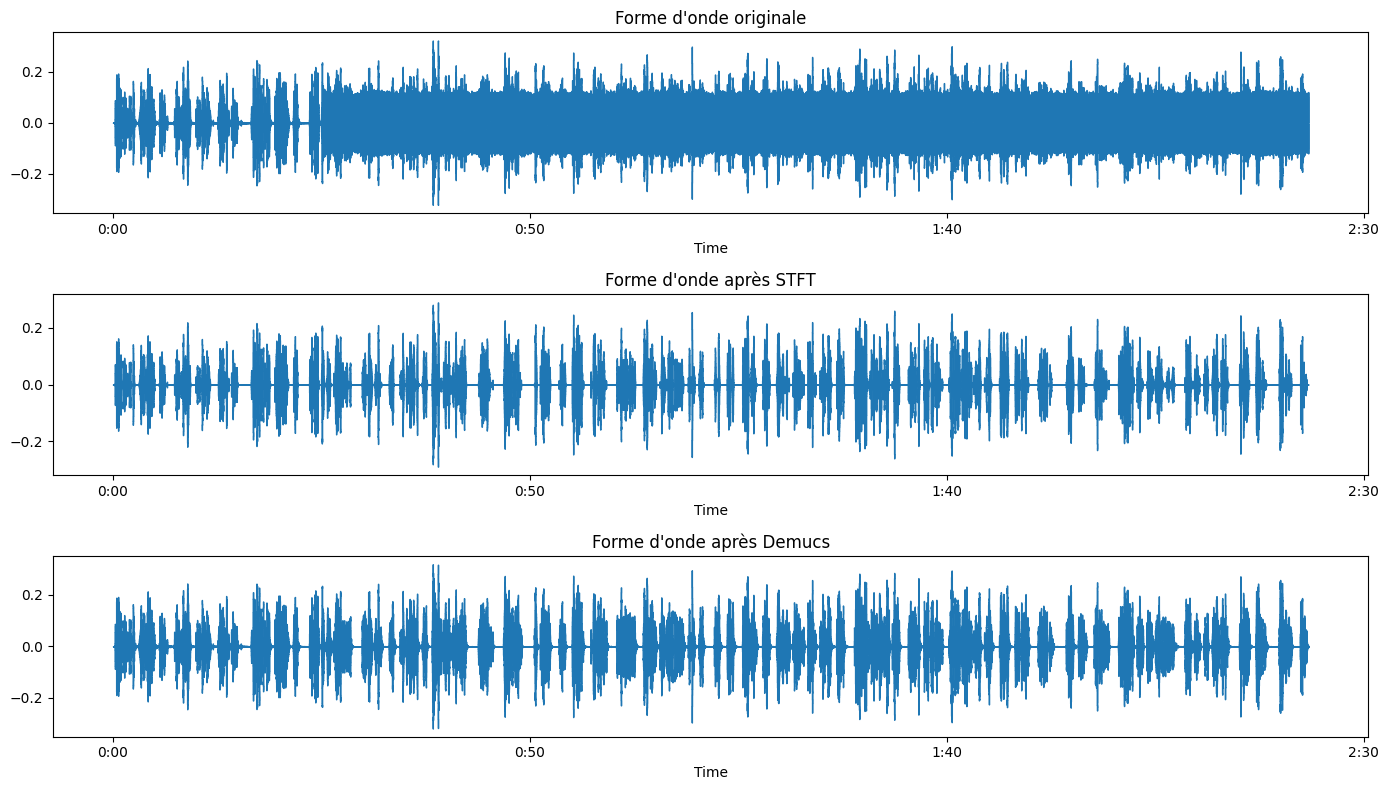

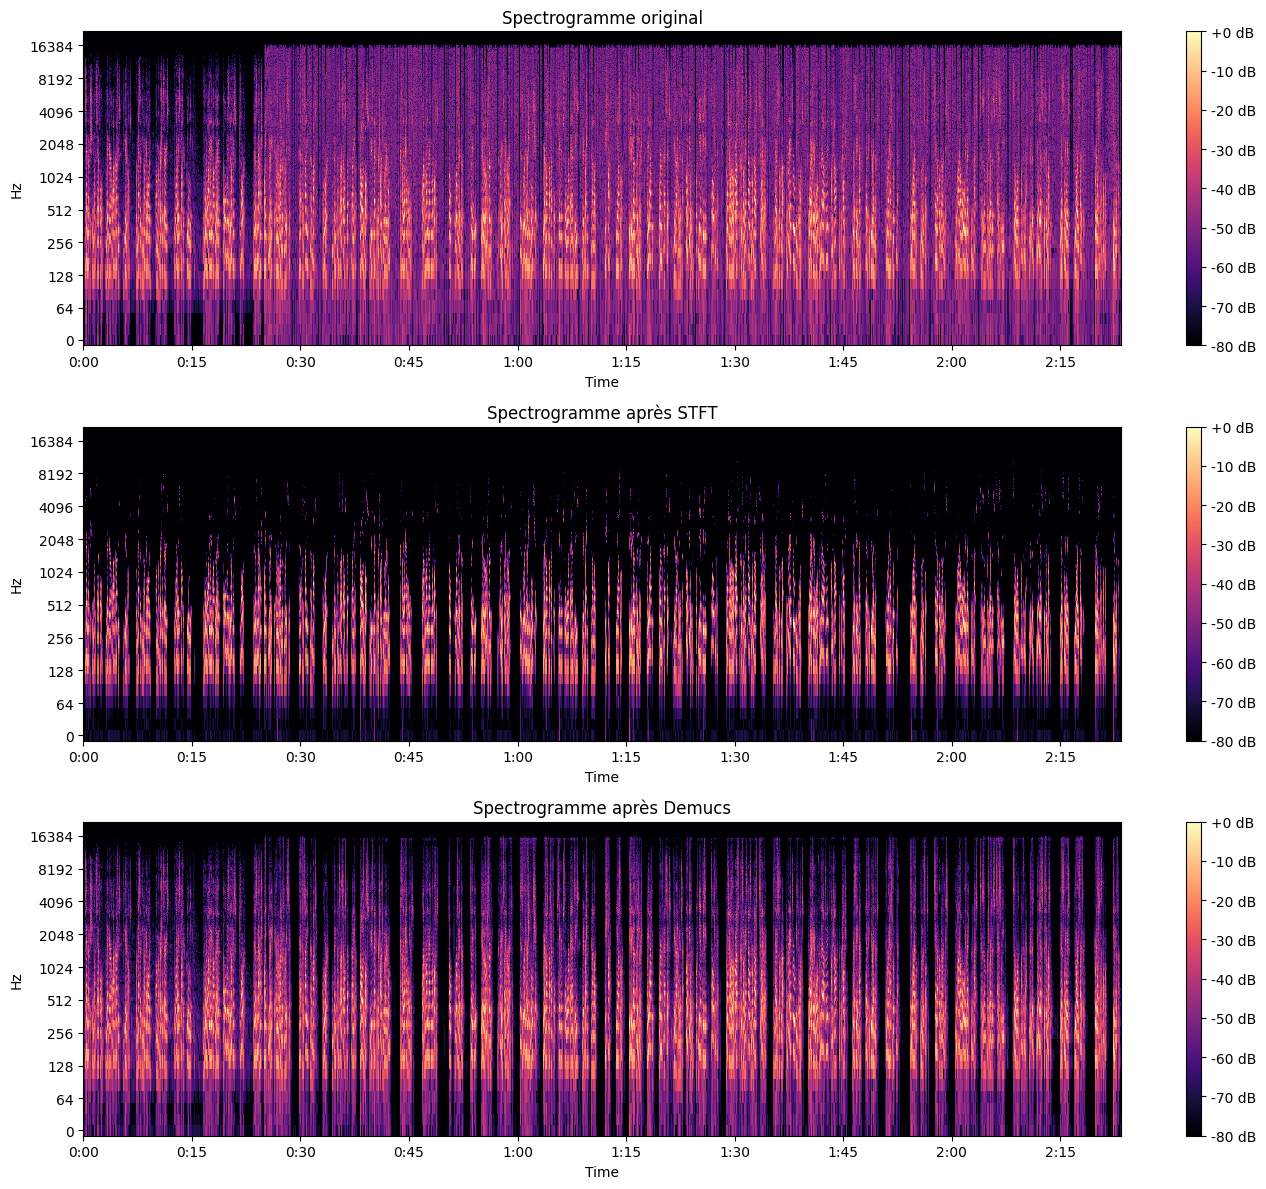

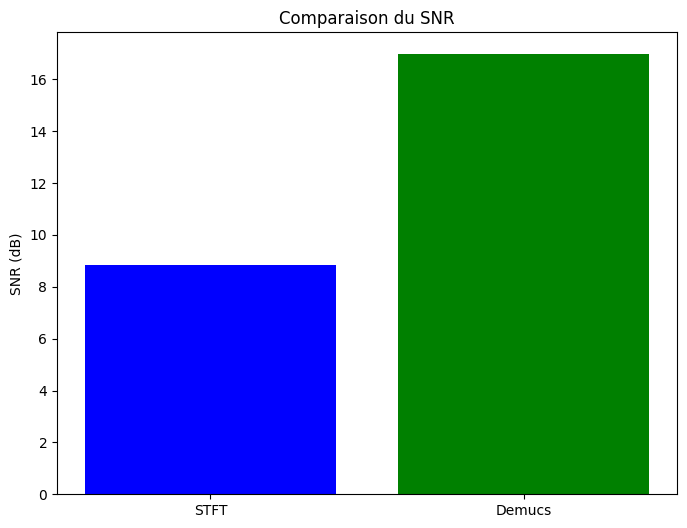

In [2]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import time

def load_audio(file_path):
    """Charge un fichier audio."""
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

def calculate_snr(original, processed):
    """Calcule le rapport signal/bruit (SNR)."""
    signal_power = np.sum(processed ** 2)
    noise_power = np.sum((original - processed) ** 2)
    return 10 * np.log10(signal_power / noise_power)

def plot_waveforms(original, stft_processed, demucs_processed, sr):
    """Affiche les formes d'onde."""
    plt.figure(figsize=(14, 8))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(original, sr=sr)
    plt.title("Forme d'onde originale")

    plt.subplot(3, 1, 2)
    librosa.display.waveshow(stft_processed, sr=sr)
    plt.title("Forme d'onde après STFT")

    plt.subplot(3, 1, 3)
    librosa.display.waveshow(demucs_processed, sr=sr)
    plt.title("Forme d'onde après Demucs")

    plt.tight_layout()
    plt.show()

def plot_spectrograms(original, stft_processed, demucs_processed, sr):
    """Affiche les spectrogrammes."""
    plt.figure(figsize=(14, 12))
    plt.subplot(3, 1, 1)
    D_original = librosa.amplitude_to_db(np.abs(librosa.stft(original)), ref=np.max)
    librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
    plt.title("Spectrogramme original")
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(3, 1, 2)
    D_stft = librosa.amplitude_to_db(np.abs(librosa.stft(stft_processed)), ref=np.max)
    librosa.display.specshow(D_stft, sr=sr, x_axis='time', y_axis='log')
    plt.title("Spectrogramme après STFT")
    plt.colorbar(format='%+2.0f dB')

    plt.subplot(3, 1, 3)
    D_demucs = librosa.amplitude_to_db(np.abs(librosa.stft(demucs_processed)), ref=np.max)
    librosa.display.specshow(D_demucs, sr=sr, x_axis='time', y_axis='log')
    plt.title("Spectrogramme après Demucs")
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

def plot_snr_comparison(snr_stft, snr_demucs):
    """Affiche une comparaison des SNR."""
    methods = ['STFT', 'Demucs']
    snr_values = [snr_stft, snr_demucs]

    plt.figure(figsize=(8, 6))
    plt.bar(methods, snr_values, color=['blue', 'green'])
    plt.ylabel('SNR (dB)')
    plt.title('Comparaison du SNR')
    plt.show()

# Chemins des fichiers audio
original_audio_path = "data/radiobruite.wav"
stft_cleaned_path = "stft_cleaned_audio_output/cleaned_audio_stft.wav"
demucs_cleaned_path = "demucs_output/htdemucs/radiobruite/vocals.wav"

# Chargement des fichiers
original_audio, sr_original = load_audio(original_audio_path)
stft_audio, sr_stft = load_audio(stft_cleaned_path)
demucs_audio, sr_demucs = load_audio(demucs_cleaned_path)

# Calcul des métriques
snr_stft = calculate_snr(original_audio, stft_audio)
snr_demucs = calculate_snr(original_audio, demucs_audio)

# Affichage des visualisations
plot_waveforms(original_audio, stft_audio, demucs_audio, sr_original)
plot_spectrograms(original_audio, stft_audio, demucs_audio, sr_original)
plot_snr_comparison(snr_stft, snr_demucs)


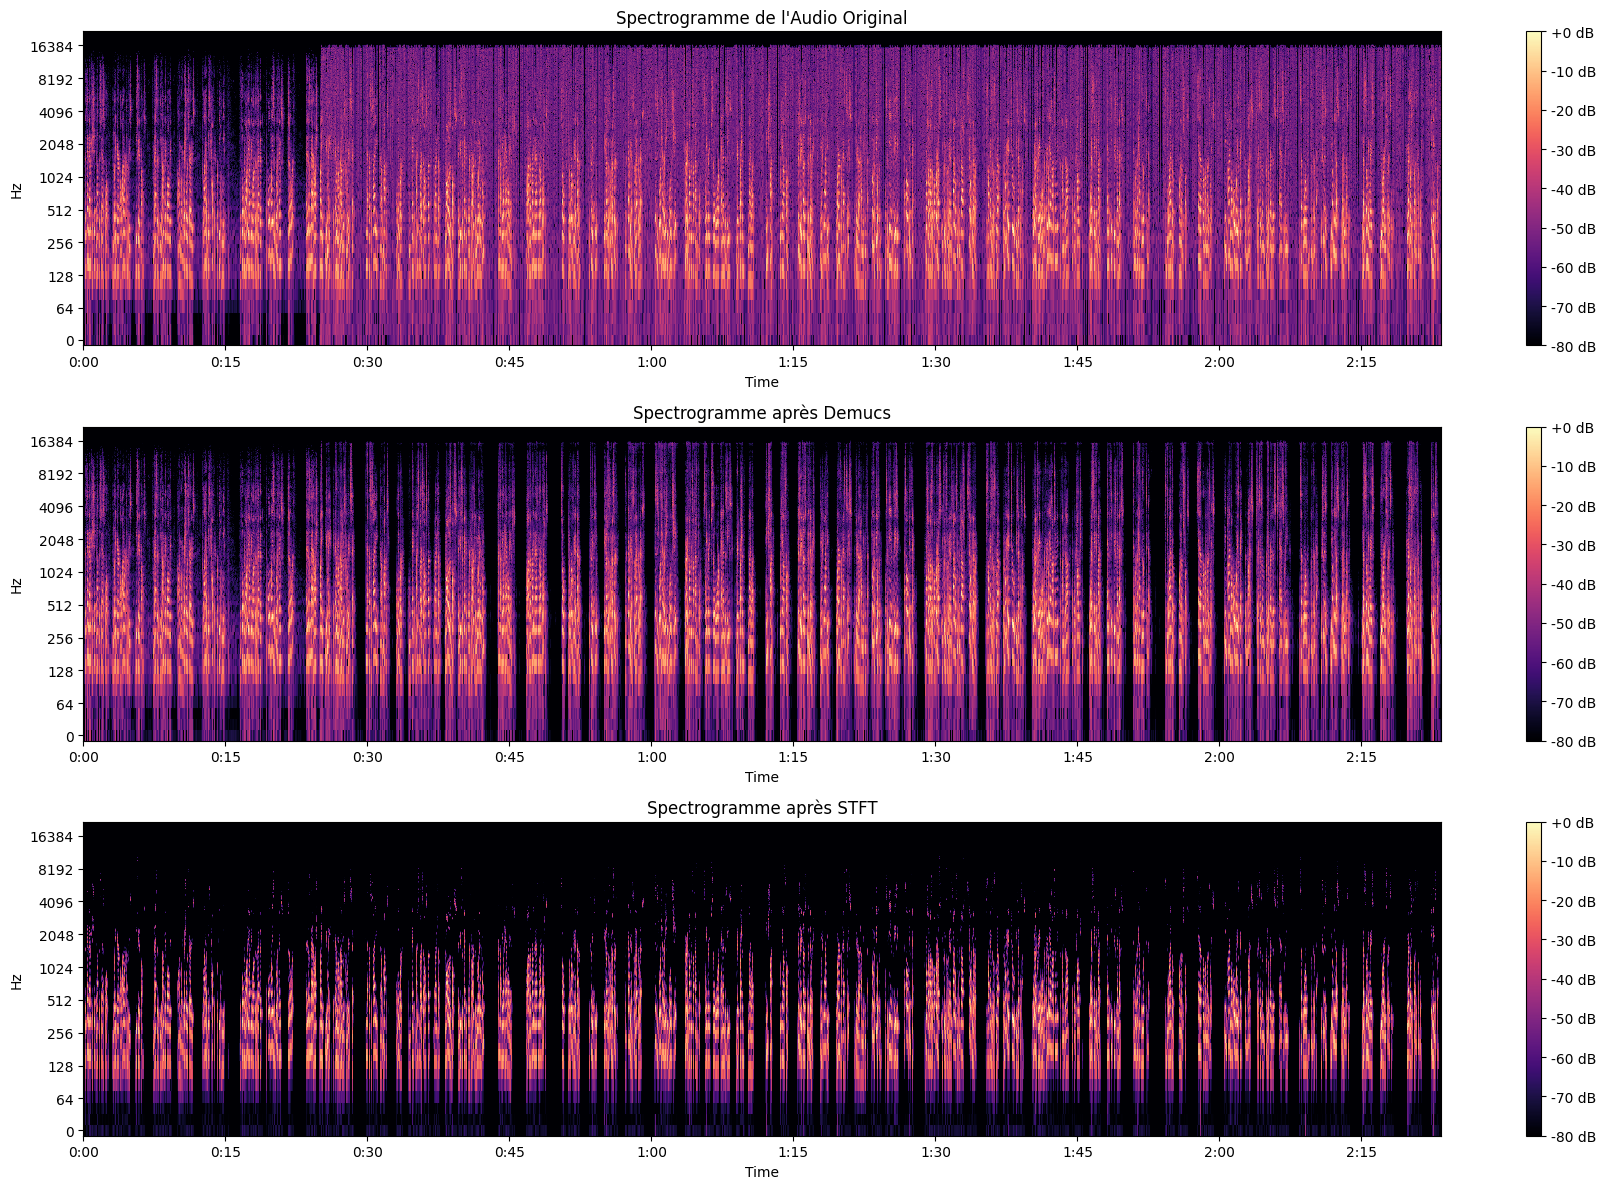

In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

def load_audio(file_path):
    """Charge un fichier audio."""
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

def plot_artifact_analysis(original, demucs_processed, stft_processed, sr):
    """Affiche les spectrogrammes pour analyser les artefacts."""
    plt.figure(figsize=(18, 12))

    # Spectrogramme de l'audio original
    plt.subplot(3, 1, 1)
    D_original = librosa.amplitude_to_db(np.abs(librosa.stft(original)), ref=np.max)
    librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log')
    plt.title("Spectrogramme de l'Audio Original")
    plt.colorbar(format='%+2.0f dB')

    # Spectrogramme du traitement Demucs
    plt.subplot(3, 1, 2)
    D_demucs = librosa.amplitude_to_db(np.abs(librosa.stft(demucs_processed)), ref=np.max)
    librosa.display.specshow(D_demucs, sr=sr, x_axis='time', y_axis='log')
    plt.title("Spectrogramme après Demucs")
    plt.colorbar(format='%+2.0f dB')

    # Spectrogramme du traitement STFT
    plt.subplot(3, 1, 3)
    D_stft = librosa.amplitude_to_db(np.abs(librosa.stft(stft_processed)), ref=np.max)
    librosa.display.specshow(D_stft, sr=sr, x_axis='time', y_axis='log')
    plt.title("Spectrogramme après STFT")
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

# Chemins des fichiers audio
original_audio_path = "data/radiobruite.wav"
stft_cleaned_path = "stft_cleaned_audio_output/cleaned_audio_stft.wav"
demucs_cleaned_path = "demucs_output/htdemucs/radiobruite/vocals.wav"

# Chargement des fichiers
original_audio, sr_original = load_audio(original_audio_path)
stft_audio, sr_stft = load_audio(stft_cleaned_path)
demucs_audio, sr_demucs = load_audio(demucs_cleaned_path)

# Afficher les spectrogrammes
plot_artifact_analysis(original_audio, demucs_audio, stft_audio, sr_original)
